# STOR 566, Homework 2
### Instructor: Yao Li
### Keywords: SVM, MLP, CNN
### Due date: Sep 18, 11:55pm
### **Submission Instruction**

- Please download this script and use it to answer the questions in the homework. 
- For submission, please include your code, code output and answers in the script and submit the ipynb file on sakai.
- Please don't modify existing cells. But you can add cells between the exercise statements.
- To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language. For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

### **References:**

- You can follow the setup instructions at [here](https://pytorch.org/get-started/locally/).
- A useful tutorial on learning pytorch by examples at [here](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html).
- More illustrations of different optimizers could be found [here](https://ruder.io/optimizing-gradient-descent/).
- Check Pytorch optimization methods at [here](https://pytorch.org/docs/stable/optim.html)
- Check Pytorch data augmentation options at [here](https://pytorch.org/vision/main/transforms.html).


### **Evaluation Metrics of Classifiers:**

- Average loss of an epoch: 
    \begin{align}
	  \frac{1}{B}\sum_{b=1}^B\sum_{d=1}^{D_b}\frac{loss(y_{bd}, f(x_{bd}))}{D_b}
	  \end{align}
    for each training epoch
    
    - $B$: the total number of batches
    - $D_b$: the number of observations in $b$-th batch
    - $f$: the model (Logistic regression or Linear SVM or MLP or CNN)
    - loss: logistic loss or the loss of linear SVM or cross-entropy
    - $(x_{bd}, y_{bd})$: the $d$-th pair of input data and label in $b$-th batch
    - An epoch is defined as one iteration over all observations in the training dataset

- Testing accuracy: 
	\begin{align}
	\frac{1}{N}\sum_{i=1}^N {\bf 1}(\hat{y}_i=y_i)
	\end{align}	
    - $N$: the total number of samples in the testing set
    - $y_i$: true label of sample $i$
    - $\hat{y}_i$: predicted label by the model

## Problem 1 (40 points)

In this problem you will practice implementing Linear SVM and Logistic Regression to classify **handwritten digit 0 and 1**.

**Data.** You will use MNIST digit classification dataset. Pytorch/torchvision has provide a useful dataloader to automatically download and load the data into batches. In this homework, you need two class, digit 0 and digit 1, for binary classification. Code of the data loader has been provided in the template. Please don't modify the data loading part.

In [1]:
## The following code can change the working directory to your google drive
## So you don't need to download the data every time
"""
import os
from google.colab import drive 
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/YOUR_NEW_WD')
"""

"\nimport os\nfrom google.colab import drive \ndrive.mount('/content/drive')\nos.chdir('/content/drive/MyDrive/YOUR_NEW_WD')\n"

In [30]:
## Data loading code chunk, please don't modify it. 
## However, you can adjust the batch size if you want to.
batch_size = 64
data_dir = './data'

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import torch.utils.data as td
import random, time
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler

## USE THIS SNIPPET TO GET BINARY TRAIN/TEST DATA

train_data = datasets.MNIST(data_dir, train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
# Once you have downloaded the data by setting download=True, you can
# change download=True to download=False
test_data = datasets.MNIST(data_dir, train=False, download=False,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

subset_indices = ((train_data.targets == 0) + (train_data.targets == 1)).nonzero()
train_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size, 
  shuffle=False,sampler=SubsetRandomSampler(subset_indices.view(-1)))


subset_indices = ((test_data.targets == 0) + (test_data.targets == 1)).nonzero()
test_loader = torch.utils.data.DataLoader(test_data,batch_size=batch_size, 
  shuffle=False,sampler=SubsetRandomSampler(subset_indices.view(-1)))

### **Problem Description.**
### 1. (20 points) Implement **Logistic Regression** with Pytorch to do handwritten digit 0 vs. 1 classification. Pick an optimizer yourself. 

In [3]:
## Implementation of Logistic Regression
## You can insert more code chunks and text cells if you want to.
## Your code:

## A template is provided but you don't have to follow it:
"""
# The number of epochs is at least 10, you can increase it to achieve better performance
num_epochs = 10

# Training the Model
for epoch in range(num_epochs):
    total_loss = 0
    for i, (images, labels) in enumerate(train_loader):
        # Convert the 28*28 image matrix into a 784-dim vector
        images = images.view(-1, 28*28) 
        # Convert labels from 0,1 to -1,1
        labels = 2*(labels.float()-0.5)
        
        ## TODO 
        # 1. Compute Loss. Check torch functions for the corresponding loss for Logistic and SVM
        # 2. Do optimization. Chec torch.optim to see how to do optimization with pytorch
        # 3. Save batch loss

    ## Save average epoch loss
"""


'\n# The number of epochs is at least 10, you can increase it to achieve better performance\nnum_epochs = 10\n\n# Training the Model\nfor epoch in range(num_epochs):\n    total_loss = 0\n    for i, (images, labels) in enumerate(train_loader):\n        # Convert the 28*28 image matrix into a 784-dim vector\n        images = images.view(-1, 28*28) \n        # Convert labels from 0,1 to -1,1\n        labels = 2*(labels.float()-0.5)\n        \n        ## TODO \n        # 1. Compute Loss. Check torch functions for the corresponding loss for Logistic and SVM\n        # 2. Do optimization. Chec torch.optim to see how to do optimization with pytorch\n        # 3. Save batch loss\n\n    ## Save average epoch loss\n'

In [4]:
class LogisticRegression(nn.Module):
     def __init__(self, input_size, num_classes):
         super(LogisticRegression, self).__init__()
         self.linear = nn.Linear(input_size, num_classes)
     
     def forward(self, x):
         out = torch.sigmoid(self.linear(x))
         return out

In [5]:
from numpy.ma.core import size
from torch.autograd import Variable

# The number of epochs is at least 10, you can increase it to achieve better performance
num_epochs = 10
input_size = 28*28
num_classes = 1
learning_rate = 0.001
momentum = 0.9
model = LogisticRegression(input_size, num_classes)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

# Training the Model
epoch_loss = []
for epoch in range(num_epochs):
    total_loss = 0
    n = 0
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        outputs = model(images)
        loss = criterion(torch.squeeze(outputs), labels.float())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

        # if (i+1) % 64 == 0:
            # print('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f'% (epoch+1, num_epochs, i+1, len(train_loader), loss.item()))

    ## Save average epoch loss
    epoch_loss.append(total_loss/len(train_loader))
    print('Epoch Loss [%d]: %.4f'% (epoch+1, epoch_loss[epoch]))

Epoch Loss [1]: 0.0467
Epoch Loss [2]: 0.0101
Epoch Loss [3]: 0.0080
Epoch Loss [4]: 0.0069
Epoch Loss [5]: 0.0062
Epoch Loss [6]: 0.0056
Epoch Loss [7]: 0.0052
Epoch Loss [8]: 0.0049
Epoch Loss [9]: 0.0046
Epoch Loss [10]: 0.0044


### (a) (5 points) Report the hyper-parameters (number of epochs, learning rate, momentum etc).

Answer:

Number of epochs: 10 <br>
Learning rate: 0.001 <br>
Momentum: 0.9

### (b) (10 points) Report the **Average loss of an epoch** for every epoch by generating Average Loss vs. Epoch plot. Please report at least **10** epochs.

Text(0.5, 1.0, 'Average Loss of Every Epoch')

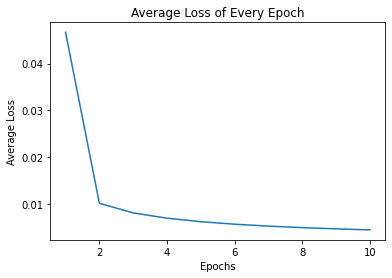

In [6]:
## Plot:
plt.plot(range(1,11), epoch_loss)
plt.xlabel('Epochs')
plt.ylabel('Average Loss')
plt.title('Average Loss of Every Epoch')

### (c) (5 points) Report the final testing accuracy of trained model.

The testing accuracy of trained model is 99.91%.

In [7]:
## Code:
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28 * 28))
    outputs = torch.squeeze(model(images))
    predicted = outputs.round().detach().numpy()
    total += labels.size(0)
    correct += np.sum((predicted == labels.detach().numpy()))

print('Accuracy of the model on the test images: %f%%' % (100 * correct / total))

Accuracy of the model on the test images: 99.905437%


### 2. (20 points) Implement **Linear SVM** with Pytorch to do handwritten digit 0 vs. 1 classification. Pick an optimizer yourself. 

In [8]:
## Implementation of Linear SVM
## You can insert more code chunks and text cells if you want to.
## Your code:

In [31]:
class SVM_Loss(nn.modules.Module):    
    def __init__(self):
        super(SVM_Loss, self).__init__()

    def forward(self, outputs, labels):
         return torch.mean(torch.clamp(1 - outputs.t() * labels, min=0))

In [32]:
# The number of epochs is at least 10, you can increase it to achieve better performance
num_epochs = 10
input_size = 28*28
num_classes = 1
learning_rate = 0.001
momentum = 0.9
model = nn.Linear(input_size, num_classes)
criterion = SVM_Loss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

# Training the Model
epoch_loss = []
for epoch in range(num_epochs):
    total_loss = 0
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.reshape(-1, 28*28))
        labels = Variable(2*(labels.float()-0.5))
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

        # if (i+1) % 64 == 0:
           # print('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f'% (epoch+1, num_epochs, i+1, len(train_loader), loss.item()))

    ## Save average epoch loss
    epoch_loss.append(total_loss/len(train_loader))
    print('Epoch Loss [%d]: %.4f'% (epoch+1, epoch_loss[epoch]))

Epoch Loss [1]: 0.0256
Epoch Loss [2]: 0.0054
Epoch Loss [3]: 0.0044
Epoch Loss [4]: 0.0038
Epoch Loss [5]: 0.0035
Epoch Loss [6]: 0.0032
Epoch Loss [7]: 0.0029
Epoch Loss [8]: 0.0027
Epoch Loss [9]: 0.0025
Epoch Loss [10]: 0.0023


### (a) (5 points) Report the hyper-parameters (number of epochs, learning rate, momentum etc).

Answer:

Number of epochs: 10 <br>
Learning rate: 0.001 <br>
Momentum: 0.9

### (b) (10 points) Report the **Average loss of an epoch** for every epoch by generating Average Loss vs. Epoch plot. Please report at least **10** epochs.

Text(0.5, 1.0, 'Average Loss of Every Epoch')

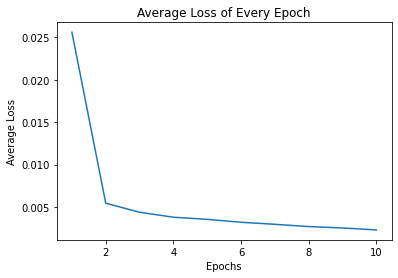

In [33]:
## Plot:
plt.plot(range(1,11), epoch_loss)
plt.xlabel('Epochs')
plt.ylabel('Average Loss')
plt.title('Average Loss of Every Epoch')

### (c) (5 points) Report the final testing accuracy of trained model.

The testing accuracy of trained model is 99.95%.

In [34]:
## Code:
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28 * 28))
    outputs = model(images)
    predicted = outputs.data >= 0
    total += labels.size(0)
    correct += (predicted.view(-1).long() == labels).sum()

print('Accuracy of the model on the test images: %f%%' % (100 * correct / total))

Accuracy of the model on the test images: 99.952721%


## Problem 2 (60 points)

In this problem you will practice implementing MLP and CNN to classify daily life images (CIFAR10).

**Data.** You will use CIFAR10 classification dataset (10 classes). Pytorch/torchvision has provide a useful dataloader to automatically download and load the data into batches. Code of the data loader has been provided in the template. Please don't modify the data loading part.

In [13]:
## Data loading code chunk, please don't modify it. 
## However, you can adjust the batch size if you want to.
batch_size_cifar = 64
data_dir = './data'

def cifar_loaders(batch_size, shuffle_test=False): 
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.225, 0.225, 0.225])
    train = datasets.CIFAR10(data_dir, train=True, download=False, 
        transform=transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomCrop(32, 4),
            transforms.ToTensor(),
            normalize,
        ]))
    # Once you have downloaded the data by setting download=True, you can
    # change download=True to download=False
    test = datasets.CIFAR10(data_dir, train=False, 
        transform=transforms.Compose([transforms.ToTensor(), normalize]))
    train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size,
        shuffle=True, pin_memory=True)
    test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size,
        shuffle=shuffle_test, pin_memory=True)
    return train_loader, test_loader

train_loader, test_loader = cifar_loaders(batch_size_cifar)

### **Problem Description.**
### 1. (20 points) Implement a 7 layers fully-connected neural networks with ReLU activation to do image classification. 

In [14]:
## Implementation of MLP
## You can insert more code chunks and text cells if you want to.
## Your code:

In [15]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(3*32*32, 1024)
        self.linear2 = nn.Linear(1024, 512)
        self.linear3 = nn.Linear(512, 256)
        self.linear4 = nn.Linear(256, 128)
        self.linear5 = nn.Linear(128, 96)
        self.linear6 = nn.Linear(96, 64)
        self.linear7 = nn.Linear(64, 10)
        
    def forward(self, xb):
        # Flatten images into vectors
        out = xb.view(xb.size(0), -1)
        out = self.linear1(out)
        out = F.relu(out)
        out = self.linear2(out)
        out = F.relu(out)
        out = self.linear3(out)
        out = F.relu(out)
        out = self.linear4(out)
        out = F.relu(out)
        out = self.linear5(out)
        out = F.relu(out)
        out = self.linear6(out)
        out = F.relu(out)
        out = self.linear7(out)
        return out

In [16]:
# The number of epochs is at least 10, you can increase it to achieve better performance
num_epochs = 50
learning_rate = 0.01
momentum = 0.9
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

# Training the Model
epoch_loss = []
for epoch in range(num_epochs):
    total_loss = 0
    for i, data in enumerate(train_loader, 0):
        input, labels = data
        
        outputs = model(input)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

        # if (i+1) % 64 == 0:
            # print('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f'% (epoch+1, num_epochs, i+1, len(train_loader), loss.item()))

    ## Save average epoch loss
    epoch_loss.append(total_loss/len(train_loader))
    print('Epoch Loss [%d]: %.4f'% (epoch+1, epoch_loss[epoch]))

Epoch Loss [1]: 2.0969
Epoch Loss [2]: 1.7905
Epoch Loss [3]: 1.6584
Epoch Loss [4]: 1.5861
Epoch Loss [5]: 1.5337
Epoch Loss [6]: 1.5026
Epoch Loss [7]: 1.4708
Epoch Loss [8]: 1.4405
Epoch Loss [9]: 1.4178
Epoch Loss [10]: 1.3986
Epoch Loss [11]: 1.3756
Epoch Loss [12]: 1.3625
Epoch Loss [13]: 1.3460
Epoch Loss [14]: 1.3288
Epoch Loss [15]: 1.3192
Epoch Loss [16]: 1.3050
Epoch Loss [17]: 1.2900
Epoch Loss [18]: 1.2768
Epoch Loss [19]: 1.2667
Epoch Loss [20]: 1.2549
Epoch Loss [21]: 1.2415
Epoch Loss [22]: 1.2317
Epoch Loss [23]: 1.2193
Epoch Loss [24]: 1.2114
Epoch Loss [25]: 1.2014
Epoch Loss [26]: 1.1900
Epoch Loss [27]: 1.1819
Epoch Loss [28]: 1.1757
Epoch Loss [29]: 1.1661
Epoch Loss [30]: 1.1554
Epoch Loss [31]: 1.1456
Epoch Loss [32]: 1.1417
Epoch Loss [33]: 1.1292
Epoch Loss [34]: 1.1211
Epoch Loss [35]: 1.1092
Epoch Loss [36]: 1.1097
Epoch Loss [37]: 1.0994
Epoch Loss [38]: 1.0942
Epoch Loss [39]: 1.0877
Epoch Loss [40]: 1.0758
Epoch Loss [41]: 1.0732
Epoch Loss [42]: 1.0669
E

### (a) (5 points) Print the model architecture.

In [17]:
## Print the model:
MLP()

MLP(
  (linear1): Linear(in_features=3072, out_features=1024, bias=True)
  (linear2): Linear(in_features=1024, out_features=512, bias=True)
  (linear3): Linear(in_features=512, out_features=256, bias=True)
  (linear4): Linear(in_features=256, out_features=128, bias=True)
  (linear5): Linear(in_features=128, out_features=96, bias=True)
  (linear6): Linear(in_features=96, out_features=64, bias=True)
  (linear7): Linear(in_features=64, out_features=10, bias=True)
)

### (b) (10 points) Report the **Average loss of an epoch** for every epoch by generating Average Loss vs. Epoch plot. Please report at least **10** epochs.

Text(0.5, 1.0, 'Average Loss of Every Epoch')

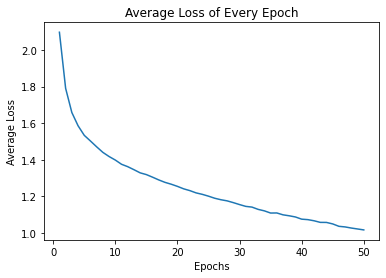

In [18]:
## Plot:
plt.plot(range(1,51), epoch_loss)
plt.xlabel('Epochs')
plt.ylabel('Average Loss')
plt.title('Average Loss of Every Epoch')

### (c) (5 points) Report the final testing accuracy of trained model.

The testing accuracy of trained model is 64%.

In [19]:
## Code:
correct = 0
total = 0
for i, data in enumerate(train_loader, 0):
    input, labels = data
    outputs = model(input)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the model on the test images: %d%%' % (100 * correct / total))

Accuracy of the model on the test images: 64%


### 2. (30 points) Implement a 7 layers CNN with 4 convolutional layers, 3 fully-connected layers and ReLU activation function. The input dimension of the 1st fully-connected layer must be 4096.

In [20]:
## Implementation of CNN
## You can insert more code chunks and text cells if you want to.
## Your code:

In [21]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 12, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(12, 24, 4)
        self.pool = nn.MaxPool2d(1, 1)
        self.conv4 = nn.Conv2d(24, 16, 6)
        self.fc1 = nn.Linear(4096, 512)
        self.fc2 = nn.Linear(512, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [22]:
# The number of epochs is at least 10, you can increase it to achieve better performance
num_epochs = 50
learning_rate = 0.01
momentum = 0.9
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

# Training the Model
epoch_loss = []
for epoch in range(num_epochs):
    total_loss = 0
    for i, data in enumerate(train_loader, 0):
        input, labels = data
        
        outputs = model(input)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

        # if (i+1) % 64 == 0:
            # print('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f'% (epoch+1, num_epochs, i+1, len(train_loader), loss.item()))

    ## Save average epoch loss
    epoch_loss.append(total_loss/len(train_loader))
    print('Epoch Loss [%d]: %.4f'% (epoch+1, epoch_loss[epoch]))

Epoch Loss [1]: 1.9577
Epoch Loss [2]: 1.6549
Epoch Loss [3]: 1.5120
Epoch Loss [4]: 1.4001
Epoch Loss [5]: 1.3250
Epoch Loss [6]: 1.2568
Epoch Loss [7]: 1.2079
Epoch Loss [8]: 1.1620
Epoch Loss [9]: 1.1296
Epoch Loss [10]: 1.0859
Epoch Loss [11]: 1.0664
Epoch Loss [12]: 1.0391
Epoch Loss [13]: 1.0257
Epoch Loss [14]: 1.0013
Epoch Loss [15]: 0.9891
Epoch Loss [16]: 0.9714
Epoch Loss [17]: 0.9658
Epoch Loss [18]: 0.9579
Epoch Loss [19]: 0.9417
Epoch Loss [20]: 0.9356
Epoch Loss [21]: 0.9125
Epoch Loss [22]: 0.9125
Epoch Loss [23]: 0.9081
Epoch Loss [24]: 0.9130
Epoch Loss [25]: 0.9015
Epoch Loss [26]: 0.8880
Epoch Loss [27]: 0.8842
Epoch Loss [28]: 0.8825
Epoch Loss [29]: 0.8773
Epoch Loss [30]: 0.8797
Epoch Loss [31]: 0.8763
Epoch Loss [32]: 0.8658
Epoch Loss [33]: 0.8669
Epoch Loss [34]: 0.8499
Epoch Loss [35]: 0.8572
Epoch Loss [36]: 0.8532
Epoch Loss [37]: 0.8444
Epoch Loss [38]: 0.8400
Epoch Loss [39]: 0.8392
Epoch Loss [40]: 0.8323
Epoch Loss [41]: 0.8314
Epoch Loss [42]: 0.8373
E

### (a) (5 points) Print the model architecture.

In [23]:
## Print the model:
CNN()

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(12, 24, kernel_size=(4, 4), stride=(1, 1))
  (conv4): Conv2d(24, 16, kernel_size=(6, 6), stride=(1, 1))
  (fc1): Linear(in_features=4096, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

### (b) (10 points) Report the **Average loss of an epoch** for every epoch by generating Average Loss vs. Epoch plot. Please report at least **10** epochs.

Text(0.5, 1.0, 'Average Loss of Every Epoch')

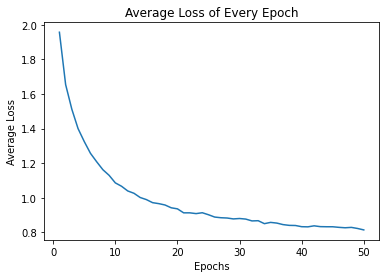

In [24]:
## Plot:
plt.plot(range(1,51), epoch_loss)
plt.xlabel('Epochs')
plt.ylabel('Average Loss')
plt.title('Average Loss of Every Epoch')

### (c) (5 points) Report the final testing accuracy of trained model.

The testing accuracy of trained model is 72%.

In [25]:
## Code:
correct = 0
total = 0
for i, data in enumerate(train_loader, 0):
    input, labels = data
    outputs = model(input)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the model on the test images: %d%%' % (100 * correct / total))

Accuracy of the model on the test images: 72%


### (d) (10 points) Write a new cifar$\_$loaders function to try different data augmentation methods.

In [29]:
## Code:
batch_size = 100
def cifar_loaders(batch_size, shuffle_test=False): 
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.225, 0.225, 0.225])
    train = datasets.CIFAR10(data_dir, train=True, download=False, 
        transform=transforms.Compose([
            transforms.RandomGrayscale(0.2),
            transforms.RandomRotation(90),
            transforms.GaussianBlur(49),
            transforms.ToTensor(),
            normalize,
        ]))
    # Once you have downloaded the data by setting download=True, you can
    # change download=True to download=False
    test = datasets.CIFAR10(data_dir, train=False, 
        transform=transforms.Compose([transforms.ToTensor(), normalize]))
    train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size,
        shuffle=True, pin_memory=True)
    test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size,
        shuffle=shuffle_test, pin_memory=True)
    return train, test, train_loader, test_loader

train, test, train_loader, test_loader = cifar_loaders(batch_size, shuffle_test=False)

Answer:

Different data augmentation method is shown as above.

### 3. (10 points) Please compare the results of the two models (MLP and CNN).

Answer:

MLP and CNN are with the same hyper-parameters: <br>
Number of epochs: 50; Learning rate: 0.01; Momentum: 0.9

With those same hyper-parameters, the testing accuracy of fitting the MLP trained model is 64% while the testing accuracy of fittiing the CNN trained model is 72%.

Furthermore, from the Average Loss vs. Epoch plot, we see that CNN trained model converges faster than MLP trained model.

Therefore, the CNN model with 4 convolutional layers and 3 fully-connected layers seems to be more precise than the MLP model with 7 fully-connected layers.